# MSA 2025 Phase 2 - Part 1

In [4]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [41]:
# Load data
df = pd.read_csv("./datasets/X store sales/store_sales.csv", encoding='latin1')

# Preview
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [33]:
# Basic stats
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [34]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Show data type
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## 2. Clean data

In [35]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Drop columns with all identical values
# all values are "United States"
df = df.drop(columns=['Country'])  

# Remove duplicate rows
df = df.drop_duplicates()

# Detect and clip outliers for Sales and Profit
df = df[(df['Sales'] < df['Sales'].quantile(0.99)) & (df['Profit'] > df['Profit'].quantile(0.01))]

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Sales_scaled', 'Profit_scaled', 'Discount_scaled']] = scaler.fit_transform(df[['Sales', 'Profit', 'Discount']])

# Feature selection by selecting the most important features to feed into our model while ignoring any insignificant features.
df_encoded = pd.get_dummies(df, columns=['Segment', 'Ship Mode', 'Region', 'Category', 'Sub-Category'], drop_first=True)


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


## 3. Visualise data

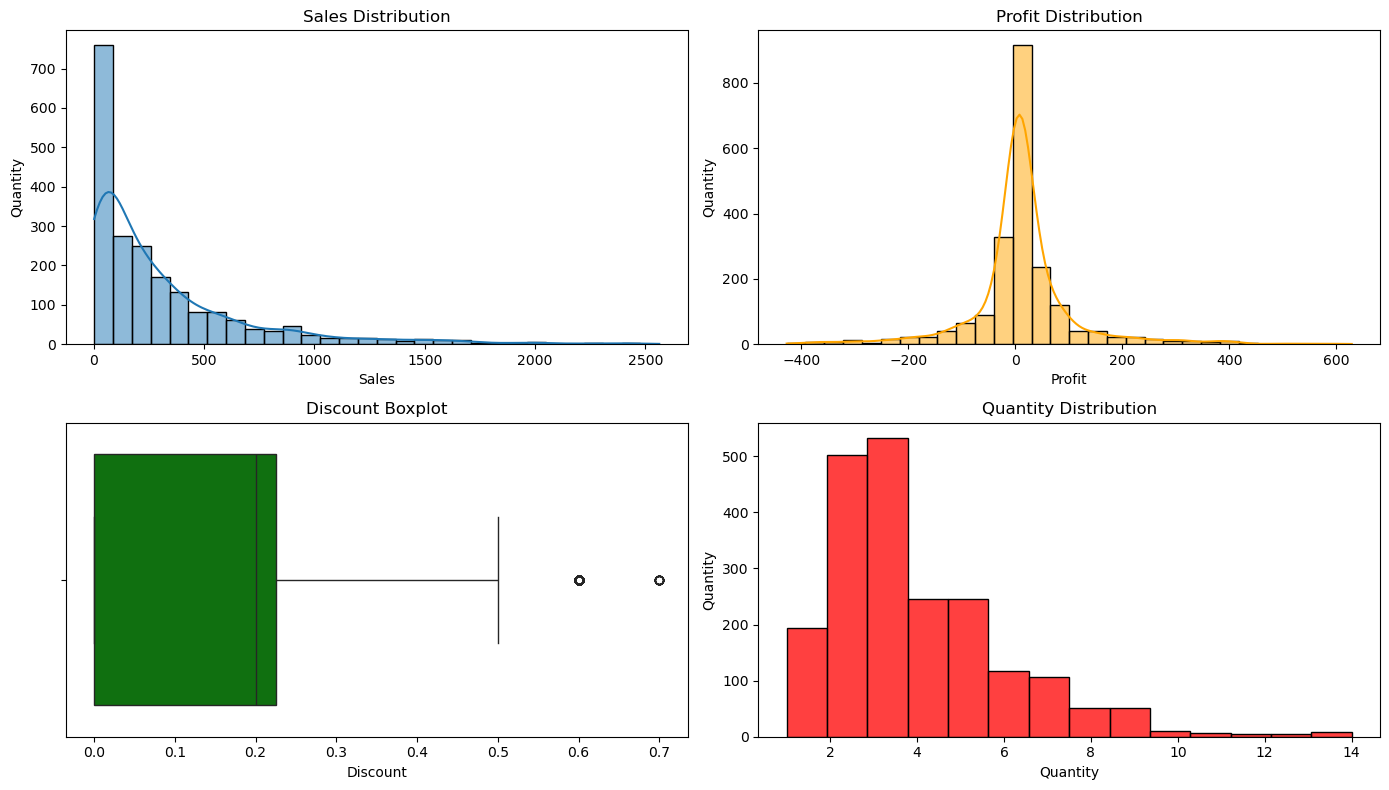

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Sales Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.ylabel('Quantity')
plt.title('Sales Distribution')

# Profit Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Profit'], bins=30, kde=True, color='orange')
plt.ylabel('Quantity')
plt.title('Profit Distribution')

# Discount Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Discount'], color='green')
plt.title('Discount Boxplot')

# Quantity Histogram
plt.subplot(2, 2, 4)
sns.histplot(df['Quantity'], bins=14, color='red')
plt.ylabel('Quantity')
plt.title('Quantity Distribution')

plt.tight_layout()
plt.show()


## 4. Identify correlated variables

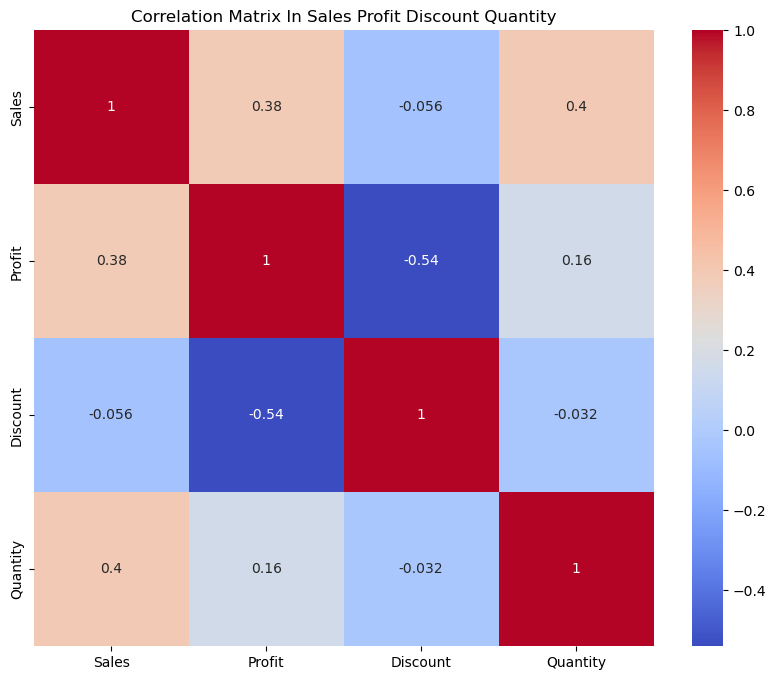

In [29]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix In Sales Profit Discount Quantity')
plt.show()


## 5. Summary

In this notebook, I conducted exploratory data analysis and preprocessing on the store sales dataset. I began by examining the structure and types of variables, converting date fields as necessary and noting that the “Country” column remained constant across all records. Data cleaning involved removing duplicate entries, clipping extreme outliers, scaling numerical features, and encoding categorical variables for model input. 

Through visualizations such as histograms and boxplots, I analyzed the distributions of sales, profit, quantity, and discount, revealing a skew in sales and negative profits in some cases. A correlation heatmap showed a weak positive relationship between sales and profit, and a moderate negative correlation between discount and profit—an expected outcome. 